# Análise de Dados de E-commerce

Este projeto explora dados de vendas, avaliações, frete e promoções.

## 1\. Análise de Vendas (`vendas.csv`)

Análise geral do desempenho de vendas para identificar as categorias e produtos de maior impacto.

### 1.1. Carregando e Visualizando os Dados

Importamos a biblioteca `pandas` e carregamos o dataset de vendas, exibindo as primeiras linhas para uma visão inicial da estrutura.

In [ ]:
import pandas as pd

df = pd.read_csv('vendas.csv')
# print(df)

df.head()

,Data,Produto,Quantidade,Preço Unitário
0,2023-01-22,Roteador,9,4323.95
1,2023-02-06,SSD,6,4411.37
2,2023-08-08,Mouse,5,3074.39
3,2023-05-01,Notebook,3,1168.05
4,2023-02-11,Notebook,6,3065.95


### 1.2. Desempenho por Categoria

Agrupamos os dados por categoria para identificar quais geram maior volume de vendas e receita.

In [61]:
categoria = df.groupby('Categoria').sum('Total')

print(categoria)

             Quantidade  Valor Unitário      Total
Categoria                                         
Beleza             1010        45293.48  262828.79
Casa               1084        51151.70  267593.86
Eletrônicos         995        48710.31  263592.64
Esportes           1233        57677.00  327402.65
Moda               1216        55784.79  316611.76


### 1.3. Produtos Mais Vendidos

Identificamos os produtos campeões de vendas, tanto em quantidade (`idxmax()`) quanto em faturamento.

In [ ]:
produto_mais_v = df.groupby('Produto')['Quantidade'].sum().idxmax()
print(produto_mais_v)

produto_maior_r = df.groupby('Produto')['Total'].sum().idxmax()
print(produto_maior_r)

Smartwatch
Luva de Boxe


### 1.4. Média de Vendas Diárias

Calculamos a média de itens vendidos por dia para analisar padrões de compra.

In [75]:
media_vendas_d = df.groupby('Data')['Quantidade'].mean()

print(media_vendas_d)

Data
2023-01-01     8.0
2023-01-02     7.0
2023-01-03     1.0
2023-01-04     6.0
2023-01-05     5.5
              ... 
2023-12-26     9.0
2023-12-27     2.0
2023-12-29     4.5
2023-12-30     5.0
2023-12-31    10.0
Name: Quantidade, Length: 344, dtype: float64


### 1.5. Correlação entre Preço e Quantidade

Verificamos a correlação entre o valor unitário e a quantidade vendida. Um valor próximo de zero indica uma fraca relação linear.

In [99]:
df['Valor Unitário'].corr(df['Quantidade'])

0.014700375705239384

### 1.6. Tendência de Vendas ao Longo do Tempo

Plotamos um gráfico de linha do total de vendas por data para visualizar a performance e identificar sazonalidades.

Data
2023-01-01    1127.16
2023-01-02    2100.21
2023-01-03     546.33
2023-01-04    6243.61
2023-01-05    2307.12
               ...   
2023-12-26    2692.98
2023-12-27    1783.35
2023-12-29    3148.38
2023-12-30    1627.30
2023-12-31    4986.20
Name: Total, Length: 344, dtype: float64


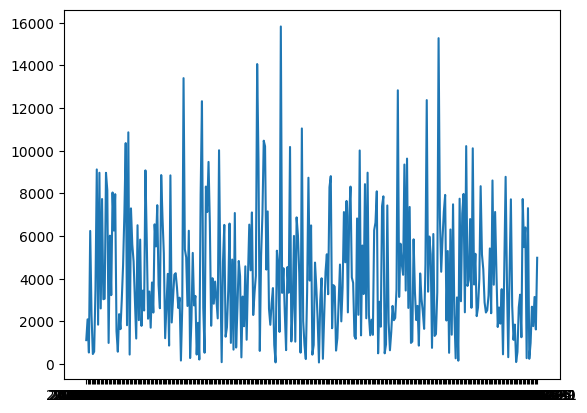

In [91]:
import matplotlib.pyplot as plt

# plt.plot(df['Quantidade'], df['Data'])
# plt.show()

tendencia_vendas = df.groupby('Data')['Total'].sum()
print(tendencia_vendas)

plt.plot(tendencia_vendas)

### 1.7. Visualização de Vendas por Categoria

Geramos um gráfico de barras para comparar visualmente a quantidade vendida em cada categoria.

     Categoria  Quantidade
0       Beleza        1010
1         Casa        1084
2  Eletrônicos         995
3     Esportes        1233
4         Moda        1216


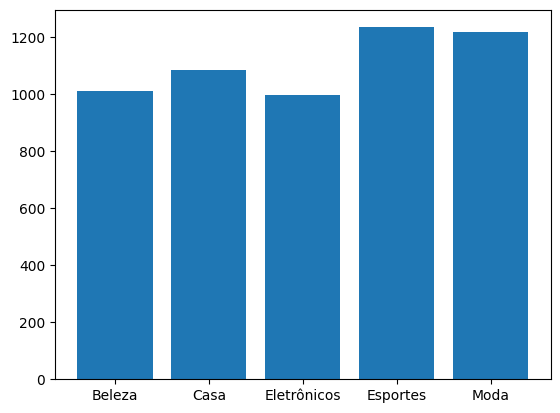

In [98]:
v_categoria = df.groupby('Categoria')['Quantidade'].sum().reset_index()

print(v_categoria)

plt.bar(v_categoria['Categoria'], v_categoria['Quantidade'])
plt.show()

## 2\. Análise de Avaliações de Clientes (`avaliacoes.csv`)

Análise do feedback dos clientes para medir a satisfação e encontrar pontos de melhoria.

### 2.1. Carregando Dados de Avaliações

Carregamos o dataset que contém as avaliações dos produtos.

In [2]:
import pandas as pd

df = pd.read_csv('avaliacoes.csv')
df.head()

,ID Cliente,Produto,Categoria,Nota Avaliação,Data Avaliação
0,1,Produto_83,Esportes,2,2024-09-21
1,2,Produto_29,Casa,4,2025-01-14
2,3,Produto_50,Esportes,1,2024-07-03
3,4,Produto_88,Eletrônicos,3,2024-11-29
4,5,Produto_54,Beleza,5,2024-05-10


### 2.2. Média de Avaliação por Categoria

Calculamos a nota média por categoria para identificar os produtos com clientes mais e menos satisfeitos.

In [ ]:
nota_categoria = df.groupby('Categoria')['Nota Avaliação'].mean()
print(nota_categoria)

maior_nota_categoria = df.groupby('Categoria')['Nota Avaliação'].mean().idxmax()
print(maior_nota_categoria)

menor_nota_categoria = df.groupby('Categoria')['Nota Avaliação'].mean().idxmin()
print(menor_nota_categoria)

Categoria
Beleza         2.955882
Casa           3.078947
Eletrônicos    2.980952
Esportes       2.902913
Moda           2.984211
Name: Nota Avaliação, dtype: float64
Casa
Esportes


### 2.3. Percentual de Avaliações Negativas

Calculamos a quantidade e o percentual de avaliações com nota 1 ou 2, um indicador importante da insatisfação dos clientes.

In [ ]:
avaliacao_negativa = len(df[((df['Nota Avaliação'] == 1) | (df['Nota Avaliação'] == 2))])
print(avaliacao_negativa)

porcentagem = (avaliacao_negativa / len(df)) * 100
print(str(porcentagem) + "%")

416
41.6%


### 2.4. Evolução Mensal das Avaliações por Categoria

Analisamos a evolução mensal da satisfação do cliente por categoria, o que pode indicar o impacto de melhorias.

Categoria    Beleza      Casa  Eletrônicos  Esportes      Moda
Mes                                                           
2024-03    3.166667  3.416667     2.800000  2.222222  3.428571
2024-04    2.562500  2.909091     3.062500  3.038462  3.125000
2024-05    2.750000  3.687500     3.411765  2.950000  3.235294
2024-06    2.909091  2.750000     2.863636  3.416667  3.250000
2024-07    2.958333  3.157895     3.312500  2.857143  2.666667
2024-08    3.315789  3.000000     3.315789  2.428571  3.363636
2024-09    3.272727  3.500000     2.916667  2.500000  2.850000
2024-10    2.750000  3.100000     3.095238  2.947368  3.000000
2024-11    2.842105  2.850000     2.666667  3.071429  2.533333
2024-12    3.454545  3.133333     2.416667  2.700000  2.760000
2025-01    2.947368  3.333333     2.909091  3.133333  3.285714
2025-02    2.833333  2.769231     2.833333  3.230769  2.647059
2025-03    3.250000  1.500000     2.857143  2.333333  2.800000


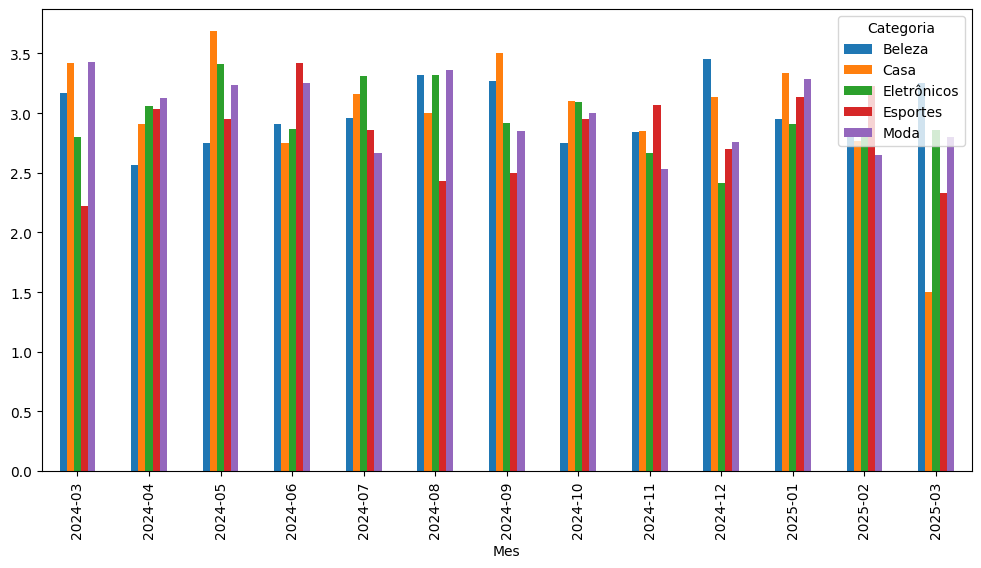

In [ ]:
df['Data Avaliação'] = pd.to_datetime(df['Data Avaliação'])
df['Mes'] = df['Data Avaliação'].dt.to_period('M')

media_avaliacoes_por_categoria_mes = df.groupby(['Categoria', 'Mes'])['Nota Avaliação'].mean().unstack(level=0)
media_avaliacoes_por_categoria_mes.plot.bar(figsize=(12, 6))

print(media_avaliacoes_por_categoria_mes)
plt.show()

### 2.5. Tendência Geral das Avaliações

Plotamos a média geral de avaliações ao longo do tempo para observar a tendência de satisfação.

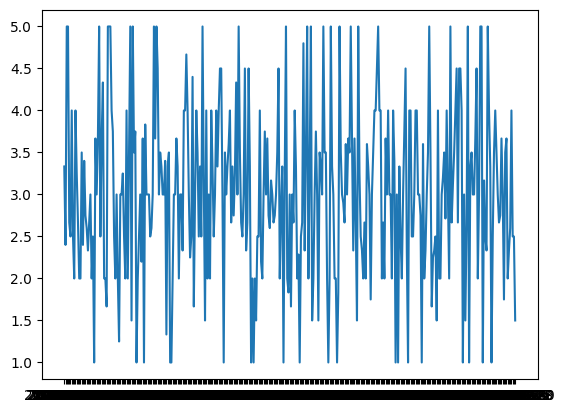

In [5]:
evolucao = df.groupby('Data Avaliação')['Nota Avaliação'].mean()

plt.plot(evolucao)
plt.show()

## 3\. Análise de Frete (`frete.csv`)

Análise dos dados de logística para entender custos e prazos de entrega.

### 3.1. Carregando Dados de Frete

Importamos o dataset com informações de entrega, incluindo região, peso, valor do frete e tempo.

In [ ]:
import pandas as pd

df = pd.read_csv('frete.csv')
# print(len(df))

print(df)

    Pedido ID        Região  Peso (kg)  Valor Frete  Tempo Entrega (dias)
0           1       Sudeste      45.83       383.98                     3
1           2  Centro-Oeste      42.65       370.03                     7
2           3           Sul      23.02       139.16                     2
3           4  Centro-Oeste       5.68        43.78                     2
4           5  Centro-Oeste      19.17       162.54                     7
..        ...           ...        ...          ...                   ...
95         96           Sul       5.71        28.70                     7
96         97  Centro-Oeste      47.09       383.29                     1
97         98      Nordeste      20.48       122.29                     8
98         99      Nordeste      26.37       141.20                     2
99        100         Norte      42.05       293.67                     3

[100 rows x 5 columns]


### 3.2. Média de Tempo e Valor de Frete por Região

Comparamos a eficiência logística entre as regiões calculando a média do tempo de entrega e do valor do frete.

Região
Centro-Oeste    4.684211
Nordeste        5.047619
Norte           3.611111
Sudeste         3.884615
Sul             5.500000
Name: Tempo Entrega (dias), dtype: float64


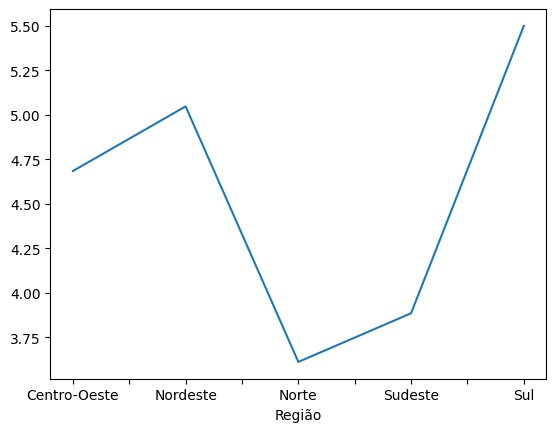

Região
Centro-Oeste    217.527368
Nordeste        184.167619
Norte           172.983889
Sudeste         182.120769
Sul             193.966250
Name: Valor Frete, dtype: float64


In [ ]:
media_tempo_regiao = df.groupby('Região')['Tempo Entrega (dias)'].mean()
print(media_tempo_regiao)

media_tempo_regiao.plot()
plt.show()

media_frete_regiao = df.groupby('Região')['Valor Frete'].mean()
print(media_frete_regiao)

### 3.3. Relação entre Peso e Valor do Frete

Analisamos como o peso do produto impacta o valor do frete, visualizando a tendência de aumento de custo.

Peso (kg)
1.03       8.19
2.62      25.94
2.98      25.34
4.18      21.81
4.96      45.74
          ...  
47.20    303.01
48.61    477.70
48.85    379.26
49.19    334.16
49.89    487.19
Name: Valor Frete, Length: 100, dtype: float64


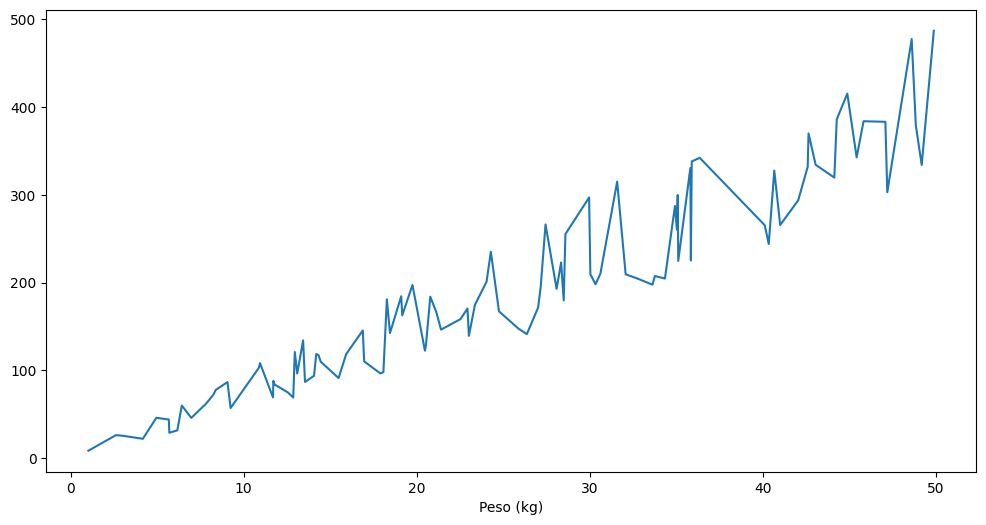

In [ ]:
media_frete_peso = df.groupby('Peso (kg)')['Valor Frete'].sum()
print(media_frete_peso)

import matplotlib.pyplot as plt

media_frete_peso.plot(figsize=(12,6))
plt.show()

### 3.4. Visualização Detalhada do Frete

Usamos um gráfico de dispersão para visualizar a relação entre peso, valor e região, oferecendo uma análise mais detalhada da política de fretes.

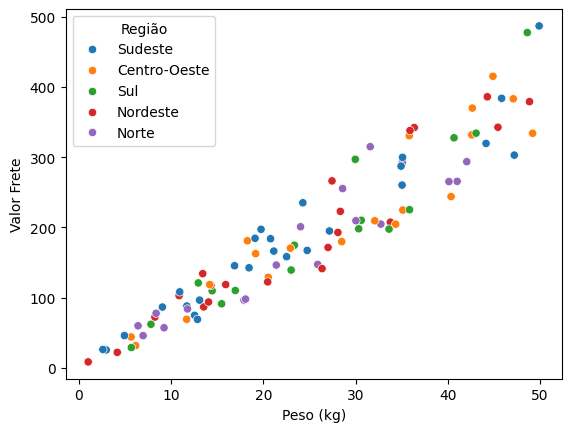

In [ ]:
import seaborn as sns

sns.scatterplot(data=df, x='Peso (kg)', y='Valor Frete', hue='Região')
plt.show()

## 4\. Análise de Promoções (`promocoes.csv`)

Análise do impacto das campanhas promocionais nas vendas.

### 4.1. Carregando Dados de Promoções

Carregamos o dataset de promoções para a análise.

In [ ]:
import pandas as pd

df = pd.read_csv('promocoes.csv')
df.head()

,Data,Produto,Categoria,Preço Original,Preço Promocional,Quantidade Vendida
0,2023-01-01,Geladeira,Eletrodomésticos,1968.50,1670.47,82
1,2023-01-02,Fogão,Eletrodomésticos,857.77,493.66,135
2,2023-01-03,TV,Eletrodomésticos,1651.22,944.08,115
3,2023-01-04,Fogão,Eletrodomésticos,1616.86,1050.35,59
4,2023-01-05,Fogão,Eletrodomésticos,386.36,220.93,54


### 4.2. Impacto do Desconto na Quantidade Vendida

Calculamos a diferença de preço e plotamos um gráfico para observar se descontos maiores resultam em mais vendas.

     Diferenca_Preco  Quantidade Vendida
0              17.91                  29
1              22.72                  46
2              24.14                 168
3              24.81                 196
4              29.01                 166
..               ...                 ...
195           791.95                  21
196           809.71                 123
197           810.39                 130
198           942.64                  44
199           950.28                  57

[200 rows x 2 columns]


<Axes: >

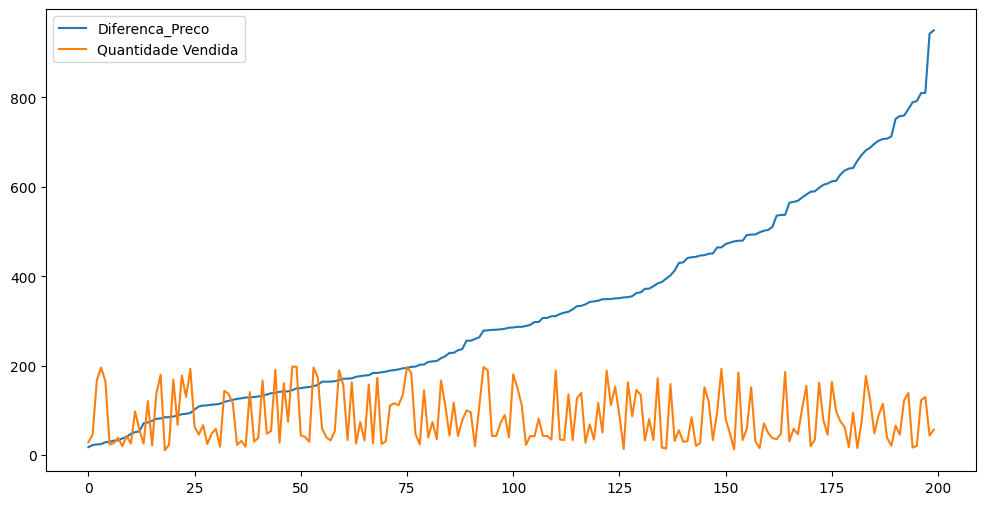

In [ ]:
import matplotlib.pyplot as plt

df['Diferenca_Preco'] = df['Preço Original'] - df['Preço Promocional']
vendas_preco_p = df.groupby('Diferenca_Preco')['Quantidade Vendida'].sum().reset_index()

print(vendas_preco_p)
vendas_preco_p.plot(figsize=(12,6))

### 4.3. Vendas por Categoria Durante Promoções

O gráfico de barras mostra quais categorias se beneficiaram mais das promoções.

<Axes: xlabel='Categoria'>

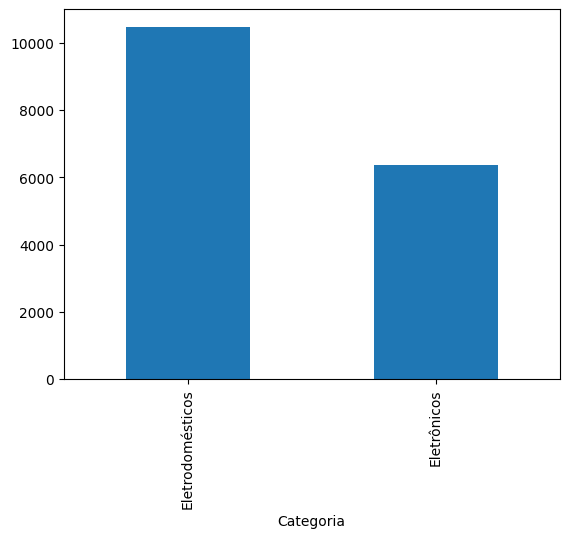

In [261]:
categoria_pro = df.groupby('Categoria')['Quantidade Vendida'].sum()

categoria_pro.plot.bar()

### 4.4. Correlação entre Desconto e Vendas

Calculamos a correlação entre o percentual de desconto e a quantidade vendida para medir a eficácia da estratégia.

In [ ]:
df['Desconto'] = df['Diferenca_Preco'] / df['Preço Original']

descontos = df.groupby('Produto')['Quantidade Vendida'].min()
print(descontos)

Produto
Fogão         18
Geladeira     11
Notebook      13
Smartphone    16
TV            19
Name: Quantidade Vendida, dtype: int64


In [266]:
correlacao = df['Desconto'].corr(df['Quantidade Vendida'])

print(correlacao)

-0.07983302575517258


### 4.5. Vendas por Produto Durante Promoções

Comparamos a quantidade vendida por produto para ver quais itens tiveram melhor desempenho em promoções.

<Axes: xlabel='Produto'>

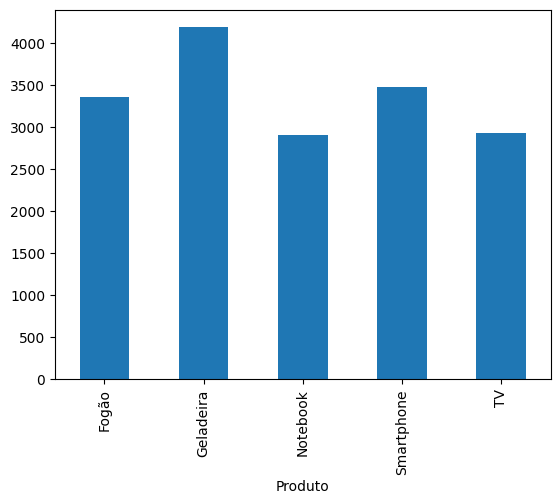

In [268]:
categoria_pro = df.groupby('Produto')['Quantidade Vendida'].sum()

categoria_pro.plot.bar()

## 5\. Análise de Vendas da Magazine Luiza (`vendas_magalu.csv`)

Análise de um dataset específico de vendas para identificar os produtos de maior destaque.

### 5.1. Carregando Dados e Calculando Valor Total

Carregamos o dataset e criamos a coluna 'Valor Total' (`Quantidade` \* `Valor Unitário`) para as análises de receita.

In [ ]:
import pandas as pd

df = pd.read_csv('vendas_magalu.csv')
df.head()

,Data,Produto,Quantidade,Valor Unitário,Categoria
0,2023-04-13,Tablet,9,1835.25,Acessórios
1,2023-12-15,Tablet,1,1263.89,Eletrônicos
2,2023-09-28,Smartphone,1,1760.03,Acessórios
3,2023-04-17,Notebook,1,1475.55,Eletrônicos
4,2023-03-13,Notebook,3,329.06,Eletrônicos


### 5.2. Análise de Receita e Quantidade por Produto

Identificamos o produto com maior receita e o mais vendido em unidades.

In [ ]:
df['Valor Total'] = df['Quantidade'] * df['Valor Unitário']

total_vendas = df.groupby('Produto')['Valor Total'].sum()
print(total_vendas)

maior_receita = df.groupby('Produto')['Valor Total'].sum().idxmax()
print('O produto com maior receita é o ' + str(maior_receita))


Produto
Fone de Ouvido    1089081.46
Notebook          1113658.76
Smartphone        1099757.62
Smartwatch        1017991.53
Tablet             951051.46
Name: Valor Total, dtype: float64
O produto com maior receita é o Notebook


In [12]:
total_quantidade = df.groupby('Produto')['Quantidade'].sum().idxmax()

print('O produto mais vendido em quantidade é o ' + str(total_quantidade))

O produto mais vendido em quantidade é o Smartphone


### 5.3. Evolução Mensal da Receita

Visualizamos a evolução da receita total mensal para identificar tendências de vendas.

C:\Users\leope\AppData\Local\Temp\ipykernel_15504\354399572.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  evolucao_tv = df.resample('M')['Valor Total'].sum()


<Axes: xlabel='Data'>

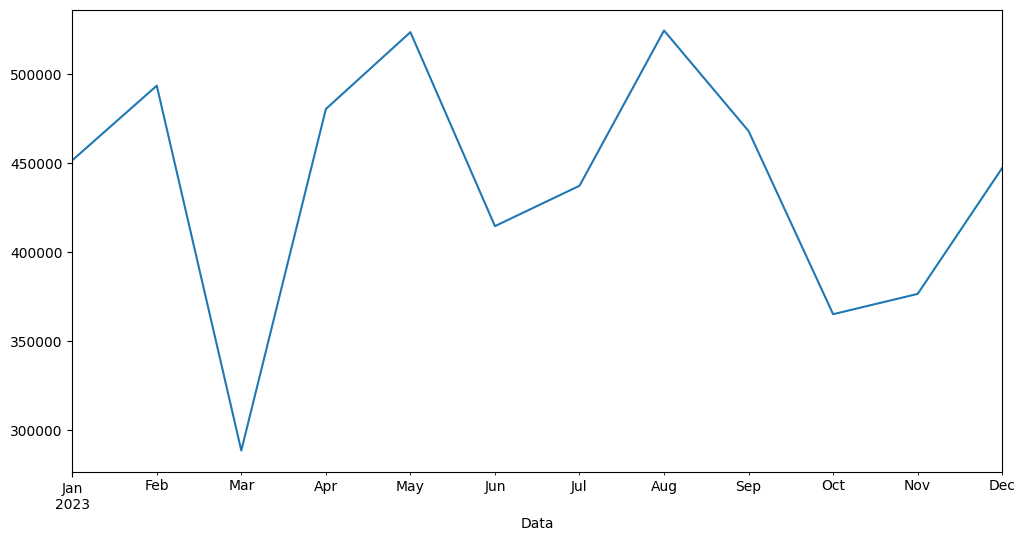

In [33]:
import matplotlib.pyplot as plt

# df['Data'] = pd.to_datetime(df['Data'])

# df.set_index('Data', inplace=True)

# evolucao_v = df.resample('M')['Quantidade'].sum()

# evolucao_v.plot(figsize=(12,6))

evolucao_tv = df.resample('M')['Valor Total'].sum()

evolucao_tv.plot(figsize=(12,6))

## 6\. Análise de Desempenho por Categoria (`desempenho_categorias.csv`)

Análise da performance financeira, com foco em lucro e margem por categoria.

### 6.1. Carregando Dados e Calculando Lucro

Carregamos o dataset de desempenho e criamos a coluna 'Lucro' (`Total de Vendas` - `Custo`).

In [ ]:
import pandas as pd

df = pd.read_csv('desempenho_categorias.csv')
df.head()

,Categoria,Mês,Total de Vendas (R$),Custo (R$),Número de Pedidos
0,Beleza,2023-09-30,45920,26243,111
1,Esportes,2023-09-30,36531,11331,86
2,Casa,2023-09-30,11585,13571,148
3,Esportes,2023-06-30,13943,12208,153
4,Esportes,2023-07-31,33939,10276,84


### 6.2. Análise de Lucro por Categoria

Identificamos as categorias mais e menos lucrativas.

Categoria
Beleza         108518
Casa            21415
Eletrônicos     35543
Esportes       107023
Moda            48542
Name: Lucro, dtype: int64


<Axes: xlabel='Categoria'>

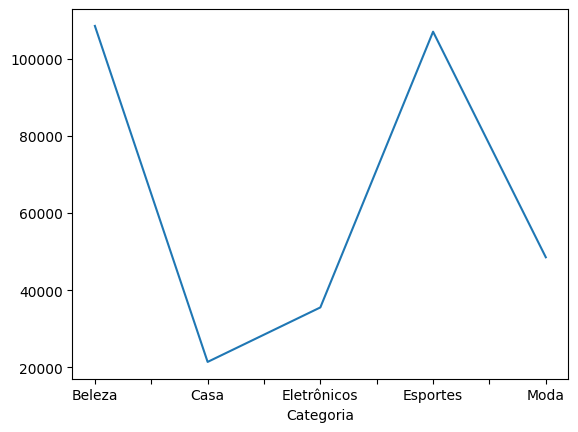

In [43]:
df['Lucro'] = df['Total de Vendas (R$)'] - df['Custo (R$)']

# df.head()

lucro_cat = df.groupby('Categoria')['Lucro'].sum()

print(lucro_cat)

import matplotlib.pyplot as plt

lucro_cat.plot()

In [44]:
lucro_maior = df.groupby('Categoria')['Lucro'].sum().idxmax()

print(lucro_maior)

lucro_menor = df.groupby('Categoria')['Lucro'].sum().idxmin()

print(lucro_menor)

Beleza
Casa


### 6.3. Análise da Margem de Lucro

Calculamos e visualizamos a margem de lucro (`Lucro` / `Total de Vendas`) para entender a rentabilidade de cada categoria.

<Axes: xlabel='Categoria'>

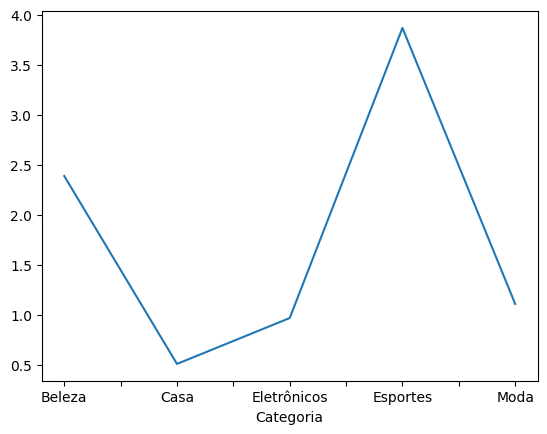

In [48]:
df['Margem de Lucro'] = df['Lucro'] / df['Total de Vendas (R$)']

marg_cat = df.groupby('Categoria')['Margem de Lucro'].sum()

marg_cat.plot()

In [46]:
df.head()

,Categoria,Mês,Total de Vendas (R$),Custo (R$),Número de Pedidos,Lucro,Margem de Lucro
0,Beleza,2023-09-30,45920,26243,111,19677,0.428506
1,Esportes,2023-09-30,36531,11331,86,25200,0.689825
2,Casa,2023-09-30,11585,13571,148,-1986,-0.171429
3,Esportes,2023-06-30,13943,12208,153,1735,0.124435
4,Esportes,2023-07-31,33939,10276,84,23663,0.697221
